In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Cài đặt thư viện MinkowskiEngine để sử dụng Sparse Convolution

In [ ]:
# Colab now uses a newer version of setuptools leading to errors with distutils.msvccompiler.
# Running this cell will cause a restart of the notebook, do that, but you can continue with the next cell after.

!pip install setuptools==71.1.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 27.6 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.1.0
    Uninstalling setuptools-75.1.0:
      Successfully uninstalled setuptools-75.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
# Remove existing CUDA and NVIDIA setup

!apt-get purge nvidia*
!apt-get autoremove
!apt-get autoclean
!rm -rf /usr/local/cuda*

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'nvidia-driver-550-server' for glob 'nvidia*'
Note, selecting 'nvidia-firmware-535-535.154.05' for glob 'nvidia*'
Note, selecting 'nvidia-docker2' for glob 'nvidia*'
Note, selecting 'nvidia-firmware-560-server-560.28.03' for glob 'nvidia*'
Note, selecting 'nvidia-cuda-toolkit-doc' for glob 'nvidia*'
Note, selecting 'nvidia-imex' for glob 'nvidia*'
Note, selecting 'nvidia-dkms-450-server' for glob 'nvidia*'
Note, selecting 'nvidia-firmware-535-server-535.154.05' for glob 'nvidia*'
Note, selecting 'nvidia-headless-390' for glob 'nvidia*'
Note, selecting 'nvidia-cuda-toolkit-gcc' for glob 'nvidia*'
Note, selecting 'nvidia-headless-418' for glob 'nvidia*'
Note, selecting 'nvidia-headless-430' for glob 'nvidia*'
Note, selecting 'nvidia-headless-435' for glob 'nvidia*'
Note, selecting 'nvidia-headless-440' for glob 'nvidia*'
Note, selecting 'nvidia-headless-450' for glob 'nvidia*'

In [ ]:
# Install CUDA 10-2

# The below set of commands were copied from Nvidia's installation instructions with some slight modifications:
# https://developer.nvidia.com/cuda-10.2-download-archive?target_os=Linux&target_arch=x86_64&target_distro=Ubuntu&target_version=1804&target_type=deblocal

!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
!mv cuda-ubuntu1804.pin /etc/apt/preferences.d/cuda-repository-pin-600
!wget https://developer.download.nvidia.com/compute/cuda/10.2/Prod/local_installers/cuda-repo-ubuntu1804-10-2-local-10.2.89-440.33.01_1.0-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1804-10-2-local-10.2.89-440.33.01_1.0-1_amd64.deb
!apt-key add /var/cuda-repo-10-2-local-10.2.89-440.33.01/7fa2af80.pub
!apt-get update
!DEBIAN_FRONTEND=noninteractive apt-get -y install cuda-10-2
!update-alternatives --install /usr/local/cuda cuda /usr/local/cuda-10.2 1

--2025-01-03 07:48:18--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 23.60.173.16, 23.60.173.59
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|23.60.173.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 190 [text/plain]
Saving to: ‘cuda-ubuntu1804.pin’

cuda-ubuntu1804.pin 100%[===================>]     190  --.-KB/s    in 0s      

2025-01-03 07:48:18 (91.0 MB/s) - ‘cuda-ubuntu1804.pin’ saved [190/190]

--2025-01-03 07:48:18--  https://developer.download.nvidia.com/compute/cuda/10.2/Prod/local_installers/cuda-repo-ubuntu1804-10-2-local-10.2.89-440.33.01_1.0-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 23.60.173.16, 23.60.173.59
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|23.60.173.16|:443... connected.
HTTP request sent, awaiting res

In [ ]:
# Installing Pytorch

!pip install torch==1.11.0 torchvision==0.12.0 -f https://download.pytorch.org/whl/cu111/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu111/torch_stable.html
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 58.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cu121
    Uninstalling torch-2.5.1+cu121:
      Successfully uninstalled torch-2.5.1+cu121
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.20.1+cu121
    Uninstalling torchvision-0.20.1+cu121:
      Successfully uninstalled torchvision-0.20.1+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
peft 0.14.0 requires torch>=1.13.0, but you have torch 1.11.0 which is incompatible.
torchaudio 2.5.1+cu121 requires torch==2.5.1, but you have torch 1.11.0 which is incompatible.


In [ ]:
# Installing gcc-7 and g++-7

!echo "deb http://archive.ubuntu.com/ubuntu focal main universe" > /etc/apt/sources.list
!apt update
!apt install gcc-7 g++-7
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-7 1
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-7 1

Get:1 file:/var/cuda-repo-10-2-local-10.2.89-440.33.01  InRelease
Ign:1 file:/var/cuda-repo-10-2-local-10.2.89-440.33.01  InRelease
Get:2 file:/var/cuda-repo-10-2-local-10.2.89-440.33.01  Release [574 B]
Get:2 file:/var/cuda-repo-10-2-local-10.2.89-440.33.01  Release [574 B]
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal InRelease [265 kB]
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu focal/main amd64 Packages [1,275 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal/universe amd64 Packages [11.3 MB]
Fetched 12.9 MB in 4s (3,350 kB/s)
Readi

In [ ]:
# Installing MinkowskiEngine

!apt-get install libopenblas-dev
!pip install git+https://github.com/NVIDIA/MinkowskiEngine.git -v

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libopenblas-dev is already the newest version (0.3.20+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
Using pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
  Cloning https://github.com/NVIDIA/MinkowskiEngine.git to /tmp/pip-req-build-dj9kx61n
  Running command git version
  git version 2.34.1
  Running command git clone --filter=blob:none https://github.com/NVIDIA/MinkowskiEngine.git /tmp/pip-req-build-dj9kx61n
  Cloning into '/tmp/pip-req-build-dj9kx61n'...
  Updating files:   0% (2/244)
  Updating files:   1% (3/244)
  Updating files:   2% (5/244)
  Updating files:   3% (8/244)
  Updating files:   4% (10/244)
  Updating files:   5% (13/244)
  Updating files:   6% (15/244)
  Updating files:   7% (18/244)
  Updating files:   8% (20/244)
  Updating files:   9% (22/244)
  Updating files:  10% (25/244)
  Updating files:  11% (27/244)
  Updating 

In [ ]:
import torch
print(f"Is CUDA available in torch?: {torch.cuda.is_available()}")
import MinkowskiEngine as ME
print(f"Is CUDA available in MinkowskiEngine?: {ME.is_cuda_available()}")
ME.print_diagnostics()

Is CUDA available in torch?: True
Is CUDA available in MinkowskiEngine?: True
==========System==========
Linux-6.1.85+-x86_64-with-glibc2.35
3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
==========Pytorch==========
1.11.0+cu102
torch.cuda.is_available(): True
==========NVIDIA-SMI==========
Driver Version 535.104.05
CUDA Version 12.2
VBIOS Version 90.04.A7.00.01
Image Version G183.0200.00.02
GSP Firmware Version N/A
==========NVCC==========
==========CC==========
==========MinkowskiEngine==========
0.5.4
MinkowskiEngine compiled with CUDA Support: True
NVCC version MinkowskiEngine is compiled: 10020
CUDART version MinkowskiEngine is compiled: 10020


# Download dataset từ kaggle

In [ ]:
import os

# Create Kaggle folder
os.makedirs("/root/.kaggle", exist_ok=True)

# Move the kaggle.json file to the correct location
!mv kaggle.json /root/.kaggle/

# Set permissions for the file
!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
# Replace 'dataset-name' with the actual dataset URL segment
!kaggle datasets download -d hphat9824/vn-moto-dataset

Dataset URL: https://www.kaggle.com/datasets/hphat9824/vn-moto-dataset
License(s): apache-2.0
100% 2.05G/2.06G [00:34<00:00, 131MB/s]
100% 2.06G/2.06G [00:34<00:00, 64.4MB/s]


In [ ]:
!kaggle datasets download -d hphat9824/tiny-moto-dataset

Dataset URL: https://www.kaggle.com/datasets/hphat9824/tiny-moto-dataset
License(s): unknown
 96% 217M/226M [00:03<00:00, 63.4MB/s]
100% 226M/226M [00:03<00:00, 77.4MB/s]


In [ ]:
!unzip tiny-moto-dataset.zip -d /content/tiny-moto-dataset

Archive:  tiny-moto-dataset.zip
  inflating: /content/tiny-moto-dataset/Honda/22520193-22520234-22520363.Honda.110.png  
  inflating: /content/tiny-moto-dataset/Honda/22520193-22520234-22520363.Honda.71.png  
  inflating: /content/tiny-moto-dataset/Honda/22520193-22520234-22520363.Honda.82.png  
  inflating: /content/tiny-moto-dataset/Honda/22520968-22520996-22520999-22520929-22521373.Honda.471.jpg  
  inflating: /content/tiny-moto-dataset/Honda/22520968-22520996-22520999-22520929-22521373.Honda.472.jpeg  
  inflating: /content/tiny-moto-dataset/Honda/22520968-22520996-22520999-22520929-22521373.Honda.473.jpeg  
  inflating: /content/tiny-moto-dataset/Honda/22520968-22520996-22520999-22520929-22521373.Honda.474.jpeg  
  inflating: /content/tiny-moto-dataset/Honda/22520968-22520996-22520999-22520929-22521373.Honda.475.jpeg  
  inflating: /content/tiny-moto-dataset/Honda/22520968-22520996-22520999-22520929-22521373.Honda.476.jpeg  
  inflating: /content/tiny-moto-dataset/Honda/22520968-2

In [ ]:
!unzip vn-moto-dataset.zip -d /content/vn-moto-dataset

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/vn-moto-dataset/VinFast/22521005-22520488-22520619.Vinfast.39.jpg  
  inflating: /content/vn-moto-dataset/VinFast/22521005-22520488-22520619.Vinfast.40.jpg  
  inflating: /content/vn-moto-dataset/VinFast/22521005-22520488-22520619.Vinfast.41.jpg  
  inflating: /content/vn-moto-dataset/VinFast/22521005-22520488-22520619.Vinfast.42.jpg  
  inflating: /content/vn-moto-dataset/VinFast/22521005-22520488-22520619.Vinfast.43.jpg  
  inflating: /content/vn-moto-dataset/VinFast/22521005-22520488-22520619.Vinfast.44.jpg  
  inflating: /content/vn-moto-dataset/VinFast/22521005-22520488-22520619.Vinfast.45.jpg  
  inflating: /content/vn-moto-dataset/VinFast/22521005-22520488-22520619.Vinfast.46.jpg  
  inflating: /content/vn-moto-dataset/VinFast/22521005-22520488-22520619.Vinfast.47.jpg  
  inflating: /content/vn-moto-dataset/VinFast/22521005-22520488-22520619.Vinfast.48.jpg  
  inflating: /content/vn-moto-dataset/VinFa

In [ ]:
!pip install torch timm

In [ ]:
train_images_path = []
train_dir = '/content/vn-moto-dataset'
for subfolder in os.listdir(train_dir):
    if not subfolder.endswith('.txt'):
        for file in os.listdir(os.path.join(train_dir,subfolder)):
            if file.lower().endswith('png') or file.lower().endswith('jpg') or file.lower().endswith('jpeg'):
                train_images_path.append(os.path.join(train_dir,subfolder, file))

In [ ]:
from torch.utils.data import Dataset
from PIL import Image
import cv2
import numpy as np
from timm.models.layers import trunc_normal_,DropPath
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
import argparse
import sys
from tqdm import tqdm
import math
import random
from MinkowskiEngine import SparseTensor
from MinkowskiEngine import (
    MinkowskiConvolution,
    MinkowskiChannelwiseConvolution,
    MinkowskiLinear,
    MinkowskiGELU
)
from MinkowskiOps import (
    to_sparse,
)

# Data Loader

In [ ]:
class MyDataset(Dataset):
    def __init__(self, images_path, transform = None):
        self.images_path = images_path
        self.transform = transform
        self.valid_images_path = []
        for path in self.images_path:
            img = Image.open(path)
            if img.mode != "P":  # Exclude palette mode
                self.valid_images_path.append(path)
    def __len__(self):
        return len(self.valid_images_path)
    def __getitem__(self, item):
        img = Image.open(self.valid_images_path[item]).convert("RGB")
        if self.transform is not None:
            img = self.transform(img)
        return img

In [ ]:
len(train_images_path)

15178

# ConvNeXt V1

## Encoder

In [ ]:
class LayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-6, data_format="channels_last"):
        super().__init__()
        self.weight = nn.Parameter(torch.ones(normalized_shape), requires_grad=True)
        self.bias = nn.Parameter(torch.zeros(normalized_shape), requires_grad=True)
        self.eps = eps
        self.data_format = data_format
        if self.data_format not in ["channels_last", "channels_first"]:
            raise ValueError(f"not support data format '{self.data_format}'")
        self.normalized_shape = (normalized_shape,)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        if self.data_format == "channels_last":
            return F.layer_norm(x, self.normalized_shape, self.weight, self.bias, self.eps)
        elif self.data_format == "channels_first":
            # [batch_size, channels, height, width]
            mean = x.mean(1, keepdim=True)
            var = (x - mean).pow(2).mean(1, keepdim=True)
            x = (x - mean) / torch.sqrt(var + self.eps)
            x = self.weight[:, None, None] * x + self.bias[:, None, None]
            return x

In [ ]:
class MinkowskiDropPath(nn.Module):
    """ Drop Path for sparse tensors.
    """

    def __init__(self, drop_prob: float = 0., scale_by_keep: bool = True):
        super(MinkowskiDropPath, self).__init__()
        self.drop_prob = drop_prob
        self.scale_by_keep = scale_by_keep

    def forward(self, x):
        if self.drop_prob == 0. or not self.training:
            return x
        cm = x.coordinate_manager
        in_key = x.coordinate_map_key
        keep_prob = 1 - self.drop_prob
        mask = torch.cat([
            torch.ones(len(_)) if random.uniform(0, 1) > self.drop_prob
            else torch.zeros(len(_)) for _ in x.decomposed_coordinates
        ]).view(-1, 1).to(x.device)
        if keep_prob > 0.0 and self.scale_by_keep:
            mask.div_(keep_prob)
        return SparseTensor(
                x.F * mask,
                coordinate_map_key=in_key,
                coordinate_manager=cm)

In [ ]:
class MinkowskiLayerNorm(nn.Module):
    """ Channel-wise layer normalization for sparse tensors.
    """

    def __init__(
        self,
        normalized_shape,
        eps=1e-6,
    ):
        super(MinkowskiLayerNorm, self).__init__()
        self.ln = nn.LayerNorm(normalized_shape, eps=eps)
    def forward(self, input):
        output = self.ln(input.F)
        return SparseTensor(
            output,
            coordinate_map_key=input.coordinate_map_key,
            coordinate_manager=input.coordinate_manager)

In [ ]:
class SparseBlock(nn.Module):
    def __init__(self, dim, drop_path=0., layer_scale_init_value=1e-6):
        super().__init__()
        self.dwconv = MinkowskiChannelwiseConvolution(dim, kernel_size=7, bias=True, dimension=D)
        self.norm = MinkowskiLayerNorm(dim, 1e-6)
        self.pwconv1 = MinkowskiLinear(dim, 4 * dim)
        self.act = MinkowskiGELU()
        self.pwconv2 = MinkowskiLinear(4 * dim, dim)
        self.drop_path = MinkowskiDropPath(drop_path)

    def forward(self, x):
        input = x
        x = self.dwconv(x)
        x = x.permute(0, 2, 3, 1) # (N, C, H, W) -> (N, H, W, C)
        x = self.norm(x)
        x = self.pwconv1(x)
        x = self.act(x)
        x = self.pwconv2(x)
        if self.gamma is not None:
            x = self.gamma * x
        x = x.permute(0, 3, 1, 2) # (N, H, W, C) -> (N, C, H, W)

        x = input + self.drop_path(x)
        return x

In [ ]:
class SparseConvNeXtV1(nn.Module):
    def __init__(self, in_chans=3, num_classes=1000, depths=[3, 3, 9, 3], dims=[96, 192, 384, 768], drop_path_rate=0., D=2):
        super().__init__()
        self.depths = depths
        self.num_classes = num_classes
        self.downsample_layers = nn.ModuleList()
        stem = nn.Sequential(
            nn.Conv2d(in_chans, dims[0], kernel_size=4, stride=4),
            LayerNorm(dims[0], eps=1e-6, data_format="channels_first")
        )
        self.downsample_layers.append(stem)
        for i in range(3):
            downsample_layer = nn.Sequential(
                MinkowskiLayerNorm(dims[i], eps=1e-6),
                MinkowskiConvolution(dims[i], dims[i+1], kernel_size=2, stride=2, bias=True, dimension=D)
            )
            self.downsample_layers.append(downsample_layer)

        self.stages = nn.ModuleList() # 4 feature resolution stages, each consisting of multiple residual blocks
        dp_rates=[x.item() for x in torch.linspace(0, drop_path_rate, sum(depths))]
        cur = 0
        for i in range(4):
            stage = nn.Sequential(
                *[SparseBlock(dim=dims[i], drop_path=dp_rates[cur + j], D=D) for j in range(depths[i])]
            )
            self.stages.append(stage)
            cur += depths[i]

        self.apply(self._init_weights)

    def _init_weights(self, m):
        if isinstance(m, MinkowskiConvolution):
            trunc_normal_(m.kernel, std=.02)
            nn.init.constant_(m.bias, 0)
        if isinstance(m, MinkowskiChannelwiseConvolution):
            trunc_normal_(m.kernel, std=.02)
            nn.init.constant_(m.bias, 0)
        if isinstance(m, MinkowskiLinear):
            trunc_normal_(m.linear.weight, std=.02)
            nn.init.constant_(m.linear.bias, 0)

    def upsample_mask(self, mask, scale):
        assert len(mask.shape) == 2
        p = int(mask.shape[1] ** .5)
        return mask.reshape(-1, p, p).\
                    repeat_interleave(scale, axis=1).\
                    repeat_interleave(scale, axis=2)

    def forward(self, x, mask):
        num_stages = len(self.stages)
        mask = self.upsample_mask(mask, 2**(num_stages-1))
        mask = mask.unsqueeze(1).type_as(x)

        # patch embedding
        x = self.downsample_layers[0](x)
        x *= (1. - mask)

        # sparse encoding
        for i in range(4):
            x = self.downsample_layers[i](x) if i > 0 else x
            x = self.stages[i](x)

        return x

In [ ]:
def drop_path(x, drop_prob: float = 0., training: bool = False):
    if drop_prob == 0. or not training:
        return x
    keep_prob = 1 - drop_prob
    shape = (x.shape[0],) + (1,) * (x.ndim - 1)  # work with diff dim tensors, not just 2D ConvNets
    random_tensor = keep_prob + torch.rand(shape, dtype=x.dtype, device=x.device)
    random_tensor.floor_()  # binarize
    output = x.div(keep_prob) * random_tensor
    return output

## Decoder

In [ ]:
class DropPathConvnextV1(nn.Module):
    """Drop paths (Stochastic Depth) per sample  (when applied in main path of residual blocks).
    """
    def __init__(self, drop_prob=None):
        super(DropPathConvnextV1, self).__init__()
        self.drop_prob = drop_prob

    def forward(self, x):
        return drop_path(x, self.drop_prob, self.training)

In [ ]:
class BlockConvnextV1(nn.Module):
    def __init__(self, dim, drop_path=0.):
        super().__init__()
        self.dwconv = nn.Conv2d(dim, dim, kernel_size=7, padding=3, groups=dim) # depthwise conv
        self.norm = LayerNorm(dim, eps=1e-6)
        self.pwconv1 = nn.Linear(dim, 4 * dim) # pointwise/1x1 convs, implemented with linear layers
        self.act = nn.GELU()
        self.grn = GRN(4 * dim)
        self.pwconv2 = nn.Linear(4 * dim, dim)
        self.drop_path = DropPathDecoder(drop_path) if drop_path > 0. else nn.Identity()

    def forward(self, x):
        input = x
        x = self.dwconv(x)
        x = x.permute(0, 2, 3, 1) # (N, C, H, W) -> (N, H, W, C)
        x = self.norm(x)
        x = self.pwconv1(x)
        x = self.act(x)
        x = self.grn(x)
        x = self.pwconv2(x)
        x = x.permute(0, 3, 1, 2) # (N, H, W, C) -> (N, C, H, W)

        x = input + self.drop_path(x)
        return x

## FCMAE

In [ ]:
class FCMAE(nn.Module):
    """
        Fully Convolutional Masked Autoencoder with ConvNeXtV2 backbone

    """
    def __init__(
                self,
                img_size=224,
                in_chans=3,
                depths=[3, 3, 9, 3],
                dims=[96, 192, 384, 768],
                decoder_depth=1,
                decoder_embed_dim=512,
                patch_size=32,
                mask_ratio=0.6,
                norm_pix_loss=False):
        super().__init__()

        # configs
        self.img_size = img_size
        self.depths = depths
        self.imds = dims
        self.patch_size = patch_size
        self.mask_ratio = mask_ratio
        self.num_patches = (img_size // patch_size) ** 2
        self.decoder_embed_dim = decoder_embed_dim
        self.decoder_depth = decoder_depth
        self.norm_pix_loss = norm_pix_loss

        # encoder
        self.encoder = SparseConvNeXtV2(
            in_chans=in_chans, depths=depths, dims=dims, D=2)
        # decoder
        self.proj = nn.Conv2d(
            in_channels=dims[-1],
            out_channels=decoder_embed_dim,
            kernel_size=1)
        # mask tokens
        self.mask_token = nn.Parameter(torch.zeros(1, decoder_embed_dim, 1, 1))
        decoder = [BlockDecoder(
            dim=decoder_embed_dim,
            drop_path=0.) for i in range(decoder_depth)]
        self.decoder = nn.Sequential(*decoder)
        # pred
        self.pred = nn.Conv2d(
            in_channels=decoder_embed_dim,
            out_channels=patch_size ** 2 * in_chans,
            kernel_size=1)





    def patchify(self, imgs):
        """
        imgs: (N, 3, H, W)
        x: (N, L, patch_size**2 *3)
        """
        p = self.patch_size
        assert imgs.shape[2] == imgs.shape[3] and imgs.shape[2] % p == 0

        h = w = imgs.shape[2] // p
        x = imgs.reshape(shape=(imgs.shape[0], 3, h, p, w, p))
        x = torch.einsum('nchpwq->nhwpqc', x)
        x = x.reshape(shape=(imgs.shape[0], h * w, p**2 * 3))
        return x

    def unpatchify(self, x):
        """
        x: (N, L, patch_size**2 *3)
        imgs: (N, 3, H, W)
        """
        p = self.patch_size
        h = w = int(x.shape[1]**.5)
        assert h * w == x.shape[1]

        x = x.reshape(shape=(x.shape[0], h, w, p, p, 3))
        x = torch.einsum('nhwpqc->nchpwq', x)
        imgs = x.reshape(shape=(x.shape[0], 3, h * p, h * p))
        return imgs

    def gen_random_mask(self, x, mask_ratio):
        N = x.shape[0]
        L = (x.shape[2] // self.patch_size) ** 2
        len_keep = int(L * (1 - mask_ratio))

        noise = torch.randn(N, L, device=x.device)

        # sort noise for each sample
        ids_shuffle = torch.argsort(noise, dim=1)
        ids_restore = torch.argsort(ids_shuffle, dim=1)

        # generate the binary mask: 0 is keep 1 is remove
        mask = torch.ones([N, L], device=x.device)
        mask[:, :len_keep] = 0
        # unshuffle to get the binary mask
        mask = torch.gather(mask, dim=1, index=ids_restore)
        return mask

    def upsample_mask(self, mask, scale):
        assert len(mask.shape) == 2
        p = int(mask.shape[1] ** .5)
        return mask.reshape(-1, p, p).\
                    repeat_interleave(scale, axis=1).\
                    repeat_interleave(scale, axis=2)

    def forward_encoder(self, imgs, mask_ratio):
        # generate random masks
        mask = self.gen_random_mask(imgs, mask_ratio)
        # encoding
        x = self.encoder(imgs, mask)
        return x, mask

    def forward_decoder(self, x, mask):
        x = self.proj(x)
        # append mask token
        n, c, h, w = x.shape
        mask = mask.reshape(-1, h, w).unsqueeze(1).type_as(x)
        mask_token = self.mask_token.repeat(x.shape[0], 1, x.shape[2], x.shape[3])
        x = x * (1. - mask) + mask_token * mask
        # decoding
        x = self.decoder(x)
        # pred
        pred = self.pred(x)
        return pred

    def forward_loss(self, imgs, pred, mask):
        """
        imgs: [N, 3, H, W]
        pred: [N, L, p*p*3]
        mask: [N, L], 0 is keep, 1 is remove
        """
        if len(pred.shape) == 4:
            n, c, _, _ = pred.shape
            pred = pred.reshape(n, c, -1)
            pred = torch.einsum('ncl->nlc', pred)

        target = self.patchify(imgs)
        if self.norm_pix_loss:
            mean = target.mean(dim=-1, keepdim=True)
            var = target.var(dim=-1, keepdim=True)
            target = (target - mean) / (var + 1.e-6)**.5
        loss = (pred - target) ** 2
        loss = loss.mean(dim=-1)  # [N, L], mean loss per patch

        loss = (loss * mask).sum() / mask.sum()  # mean loss on removed patches
        return loss

    def forward(self, imgs, labels=None, mask_ratio=0.6):
        x, mask = self.forward_encoder(imgs, mask_ratio)
        pred = self.forward_decoder(x, mask)
        loss = self.forward_loss(imgs, pred, mask)
        return loss, pred, mask

In [ ]:
def convnextv1_tiny(**kwargs):
    model = FCMAE(
        depths=[3, 3, 27, 3], dims=[128, 256, 512, 1024], **kwargs)
    return model

# Train FCMAE

In [ ]:
def train_one_epoch(model, optimizer, data_loader, device, epoch, lr_scheduler):
    model.train()

    accu_loss = torch.zeros(1).to(device)  # 累计损失
    optimizer.zero_grad()

    data_loader = tqdm(data_loader, file=sys.stdout)
    for step, images in enumerate(data_loader):
        loss, pred, mask = model(images.to(device))

        loss.backward()
        accu_loss += loss.detach()

        data_loader.desc = "[train epoch {}] loss: {:.3f}, lr: {:.5f}".format(
            epoch,
            accu_loss.item() / (step + 1),
            optimizer.param_groups[0]["lr"],
            #lr_scheduler
        )

        if not torch.isfinite(loss):
            print('WARNING: non-finite loss, ending training ', loss)
            sys.exit(1)

        optimizer.step()
        optimizer.zero_grad()
        # update lr
        lr_scheduler.step()

    return accu_loss.item() / (step + 1)

In [ ]:
@torch.no_grad()
def evaluate(model, data_loader, device, epoch):
    model.eval()
    accu_loss = torch.zeros(1).to(device)  # 累计损失

    data_loader = tqdm(data_loader, file=sys.stdout)
    for step, images in enumerate(data_loader):
        loss, pred, mask = model(images.to(device))

        accu_loss += loss.detach()

        data_loader.desc = "[valid epoch {}] loss: {:.3f}".format(
            epoch,
            accu_loss.item() / (step + 1),
        )

    return accu_loss.item() / (step + 1)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"using {device} device.")

using cuda device.


In [ ]:
if os.path.exists("./weights") is False:
    os.makedirs("./weights")

In [ ]:
img_size = 224
train_transform = transforms.Compose([transforms.Resize((img_size,img_size)),
                                    transforms.CenterCrop(img_size),
                                    transforms.RandomHorizontalFlip(p=0.5),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
train_dataset = MyDataset(train_images_path, train_transform)

In [ ]:
batch_size = 8
nw = min([os.cpu_count(), batch_size if batch_size > 1 else 0, 8])  # number of workers
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           pin_memory=True,
                                           num_workers=nw,)

In [ ]:
model = convnextv1_base().to(device)

In [ ]:
def get_params_groups(model: torch.nn.Module, weight_decay: float = 1e-5):
    
    parameter_group_vars = {"decay": {"params": [], "weight_decay": weight_decay},
                            "no_decay": {"params": [], "weight_decay": 0.}}

    
    parameter_group_names = {"decay": {"params": [], "weight_decay": weight_decay},
                             "no_decay": {"params": [], "weight_decay": 0.}}

    for name, param in model.named_parameters():
        if not param.requires_grad:
            continue  # frozen weights

        if len(param.shape) == 1 or name.endswith(".bias"):
            group_name = "no_decay"
        else:
            group_name = "decay"

        parameter_group_vars[group_name]["params"].append(param)
        parameter_group_names[group_name]["params"].append(name)

    return list(parameter_group_vars.values())

In [ ]:
def create_lr_scheduler(optimizer,
                        num_step: int,
                        epochs: int,
                        warmup=True,
                        warmup_epochs=1,
                        warmup_factor=1e-3,
                        end_factor=1e-6):
    assert num_step > 0 and epochs > 0
    if warmup is False:
        warmup_epochs = 0

    def f(x):
        if warmup is True and x <= (warmup_epochs * num_step):
            alpha = float(x) / (warmup_epochs * num_step)
            
            return warmup_factor * (1 - alpha) + alpha
        else:
            current_step = (x - warmup_epochs * num_step)
            cosine_steps = (epochs - warmup_epochs) * num_step
            
            return ((1 + math.cos(current_step * math.pi / cosine_steps)) / 2) * (1 - end_factor) + end_factor

    return torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=f)

In [ ]:
wd = 5e-2
epochs = 10
lr = 2e-3
pg = get_params_groups(model, weight_decay=wd)
optimizer = optim.AdamW(pg, lr=lr, weight_decay=wd)
lr_scheduler = create_lr_scheduler(optimizer, len(train_loader), epochs,
                                   warmup=True, warmup_epochs=1)

In [ ]:
best_loss = 1e9
patience = 0
for epoch in range(epochs):
    # train
    train_loss = train_one_epoch(model=model,
                                optimizer=optimizer,
                                data_loader=train_loader,
                                device=device,
                                epoch=epoch,
                                lr_scheduler=lr_scheduler)

    if train_loss < best_loss:
        best_loss = train_loss
        torch.save(model.state_dict(), "./weights/best_model.pth")

[train epoch 9] loss: 0.606, lr: 0.00000: 100%|██████████| 1888/1888 [06:55<00:00,  4.55it/s]


In [ ]:
def denormalize(img_bchw,image_mean,image_std):
    """
    Denormalize the image for correct visualization.
    """
    return img_bchw.mul(image_std).add_(image_mean).clamp_(0., 1.)

# Visualize result image

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def show_one_image(model, image, image_mean,image_std,output_path):
    try:
        model.eval()
        for image in image:
            image = image.to(device)
            loss, predictions, mask = model(image)
    except RuntimeError:
        return
    patch_size = 32
    mask = mask.unsqueeze(-1).repeat(1, 1, (patch_size**2 * 3))

    predictions = predictions.view(1, patch_size**2 * 3, -1).permute(0, 2, 1)
    predictions = model.unpatchify(predictions )

    mask = model.unpatchify(mask).to(device)

    im_masked = image * (1 - mask)
    rec_and_img = predictions * mask + im_masked
    channel_means = image.mean(dim=[2, 3], keepdim=True)
    im_mean_in = image * (1 - mask) + mask * channel_means

    # Denormalizing the images before visualization
    pred_img = denormalize(predictions * mask,image_mean=image_mean,image_std=image_std)[0].permute(1, 2, 0).cpu().detach().numpy()
    masked_img = denormalize(im_masked,image_mean=image_mean,image_std=image_std)[0].permute(1, 2, 0).cpu().detach().numpy()
    rec_img = denormalize(rec_and_img,image_mean=image_mean,image_std=image_std)[0].permute(1, 2, 0).cpu().detach().numpy()
    im_mean_in = denormalize(im_mean_in,image_mean=image_mean,image_std=image_std)[0].permute(1, 2, 0).cpu().detach().numpy()
    orig_img = denormalize(image,image_mean=image_mean,image_std=image_std)[0].permute(1, 2, 0).cpu().numpy()

    # Plot the original, masked, and reconstructed images
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 5, 1)
    plt.title("Original Image",fontsize=8)
    plt.imshow(orig_img)
    plt.axis('off')

    plt.subplot(1, 5, 2)
    plt.title("Masked Image",fontsize=8)
    plt.imshow(masked_img)
    plt.axis('off')

    plt.subplot(1, 5, 3)
    plt.title("Reconstructed Image",fontsize=8)
    plt.imshow(pred_img)
    plt.axis('off')

    plt.subplot(1, 5, 4)
    plt.title("Reconstructed + Masked Image",fontsize=8)
    plt.imshow(rec_img)
    plt.axis('off')

    plt.subplot(1, 5, 5)
    plt.title("Mean + Masked Image",fontsize=8)
    plt.imshow(im_mean_in)
    plt.axis('off')

    plt.savefig(output_path)
    plt.show()

In [ ]:
dataiter = train_images_path[:1]
dataiter

['/kaggle/input/vn-moto-dataset/Yamaha/21521815-21520058-21521591.Yamaha.550.jpg']

In [ ]:
dataiter = MyDataset(dataiter, train_transform)
dataex = torch.utils.data.DataLoader(dataiter,
                                   batch_size=batch_size,
                                   shuffle=True,
                                   pin_memory=True,
                                   num_workers=nw,)

In [ ]:
for batch in dataex:
    print(batch.shape)

torch.Size([1, 3, 224, 224])


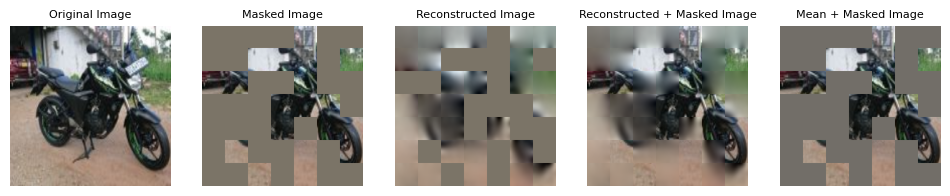

In [ ]:
IMAGENET_RGB_MEAN = torch.tensor((0.485, 0.456, 0.406), device=device).reshape(1, 3, 1, 1)
IMAGENET_RGB_STD = torch.tensor((0.229, 0.224, 0.225), device=device).reshape(1, 3, 1, 1)
show_one_image(model=model,
               image=dataex,
               image_mean=IMAGENET_RGB_MEAN,
               image_std=IMAGENET_RGB_STD,
               output_path= 'visualize.png'
                        )

# Fine tune and train classification

In [ ]:
def train_one_epoch(model, optimizer, data_loader, device, epoch, lr_scheduler):
    model.train()
    loss_function = torch.nn.CrossEntropyLoss()
    accu_loss = torch.zeros(1).to(device)
    accu_num = torch.zeros(1).to(device)
    optimizer.zero_grad()

    sample_num = 0
    data_loader = tqdm(data_loader, file=sys.stdout)
    for step, data in enumerate(data_loader):
        images, labels = data
        sample_num += images.shape[0]

        pred = model(images.to(device))
        pred_classes = torch.max(pred, dim=1)[1]
        accu_num += torch.eq(pred_classes, labels.to(device)).sum()

        loss = loss_function(pred, labels.to(device))
        loss.backward()
        accu_loss += loss.detach()

        data_loader.desc = "[train epoch {}] loss: {:.3f}, acc: {:.3f}, lr: {:.5f}".format(
            epoch,
            accu_loss.item() / (step + 1),
            accu_num.item() / sample_num,
            optimizer.param_groups[0]["lr"]
        )

        if not torch.isfinite(loss):
            print('WARNING: non-finite loss, ending training ', loss)
            sys.exit(1)

        optimizer.step()
        optimizer.zero_grad()
        # update lr
        lr_scheduler.step()

    return accu_loss.item() / (step + 1), accu_num.item() / sample_num

In [ ]:
def evaluate(model, data_loader, device, epoch):
    loss_function = torch.nn.CrossEntropyLoss()

    model.eval()

    accu_num = torch.zeros(1).to(device)
    accu_loss = torch.zeros(1).to(device)

    sample_num = 0
    data_loader = tqdm(data_loader, file=sys.stdout)
    for step, data in enumerate(data_loader):
        images, labels = data
        sample_num += images.shape[0]
        with torch.no_grad():
            pred = model(images.to(device))
        pred_classes = torch.max(pred, dim=1)[1]
        accu_num += torch.eq(pred_classes, labels.to(device)).sum()

        loss = loss_function(pred, labels.to(device))
        accu_loss += loss

        data_loader.desc = "[valid epoch {}] loss: {:.3f}, acc: {:.3f}".format(
            epoch,
            accu_loss.item() / (step + 1),
            accu_num.item() / sample_num
        )

    return accu_loss.item() / (step + 1), accu_num.item() / sample_num

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"using {device} device.")

using cuda device.


In [ ]:
model = convnextv1_base(5).to(device)
weight_dict = torch.load('/kaggle/input/best_model_v2/pytorch/default/1/best_model-ver2.pth', map_location=device)

/tmp/ipykernel_30/3336306577.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weight_dict = torch.load('/kaggle/input/best_model_v2/pytorch/default/1/best_model-ver2.pth'

In [ ]:
weight_dict.keys()

odict_keys(['mask_token', 'encoder.downsample_layers.0.0.weight', 'encoder.downsample_layers.0.0.bias', 'encoder.downsample_layers.0.1.weight', 'encoder.downsample_layers.0.1.bias', 'encoder.downsample_layers.1.0.weight', 'encoder.downsample_layers.1.0.bias', 'encoder.downsample_layers.1.1.weight', 'encoder.downsample_layers.1.1.bias', 'encoder.downsample_layers.2.0.weight', 'encoder.downsample_layers.2.0.bias', 'encoder.downsample_layers.2.1.weight', 'encoder.downsample_layers.2.1.bias', 'encoder.downsample_layers.3.0.weight', 'encoder.downsample_layers.3.0.bias', 'encoder.downsample_layers.3.1.weight', 'encoder.downsample_layers.3.1.bias', 'encoder.stages.0.0.gamma', 'encoder.stages.0.0.dwconv.weight', 'encoder.stages.0.0.dwconv.bias', 'encoder.stages.0.0.norm.weight', 'encoder.stages.0.0.norm.bias', 'encoder.stages.0.0.pwconv1.weight', 'encoder.stages.0.0.pwconv1.bias', 'encoder.stages.0.0.pwconv2.weight', 'encoder.stages.0.0.pwconv2.bias', 'encoder.stages.0.1.gamma', 'encoder.stage

In [ ]:
for k in list(weight_dict.keys()):
    if 'decoder' in k or 'mask_token'in k or 'proj' in k or 'pred' in k:
        print(f"Removing key {k} from pretrained checkpoint")
        del weight_dict[k]

Removing key mask_token from pretrained checkpoint
Removing key proj.weight from pretrained checkpoint
Removing key proj.bias from pretrained checkpoint
Removing key decoder.0.dwconv.weight from pretrained checkpoint
Removing key decoder.0.dwconv.bias from pretrained checkpoint
Removing key decoder.0.norm.weight from pretrained checkpoint
Removing key decoder.0.norm.bias from pretrained checkpoint
Removing key decoder.0.pwconv1.weight from pretrained checkpoint
Removing key decoder.0.pwconv1.bias from pretrained checkpoint
Removing key decoder.0.pwconv2.weight from pretrained checkpoint
Removing key decoder.0.pwconv2.bias from pretrained checkpoint
Removing key pred.weight from pretrained checkpoint
Removing key pred.bias from pretrained checkpoint


In [ ]:
updated_weight_dict = {}

In [ ]:
for k,v in weight_dict.items():
    if k.startswith("encoder."):
        updated_weight_dict[k[len("encoder."):]]= v
    else:
        updated_weight_dict[k] = v

In [ ]:
model.load_state_dict(updated_weight_dict, strict=False)

_IncompatibleKeys(missing_keys=['norm.weight', 'norm.bias', 'head.weight', 'head.bias'], unexpected_keys=[])

In [ ]:
for name, para in model.named_parameters():
    if 'head' not in name:
        para.requires_grad_(False)
    else:
        print("training {}".format(name))

training head.weight
training head.bias


In [ ]:
if os.path.exists("./weights") is False:
    os.makedirs("./weights")

In [ ]:
img_size = 224
train_transform = transforms.Compose([transforms.Resize((img_size,img_size)),
                                    transforms.CenterCrop(img_size),
                                    transforms.RandomHorizontalFlip(p=0.5),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
val_transform = transforms.Compose([transforms.Resize((img_size,img_size)),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
train_dataset = MyDataset(train_valid_path, train_valid_label, train_transform)
val_dataset = MyDataset(val_valid_path, val_valid_label, val_transform)

In [ ]:
batch_size = 16
nw = min([os.cpu_count(), batch_size if batch_size > 1 else 0, 8])  # number of workers
train_loader = DataLoader(train_dataset,
                       batch_size=batch_size,
                       shuffle=True,
                       pin_memory=True,
                       num_workers=nw,
                       collate_fn=train_dataset.collate_fn)
val_loader = DataLoader(val_dataset,
                       batch_size=batch_size,
                       shuffle=True,
                       pin_memory=True,
                       num_workers=nw,
                       collate_fn=val_dataset.collate_fn)

In [ ]:
def get_params_groups(model: torch.nn.Module, weight_decay: float = 1e-5):
    parameter_group_vars = {"decay": {"params": [], "weight_decay": weight_decay},
                            "no_decay": {"params": [], "weight_decay": 0.}}

    parameter_group_names = {"decay": {"params": [], "weight_decay": weight_decay},
                             "no_decay": {"params": [], "weight_decay": 0.}}

    for name, param in model.named_parameters():
        if not param.requires_grad:
            continue  # frozen weights

        if len(param.shape) == 1 or name.endswith(".bias"):
            group_name = "no_decay"
        else:
            group_name = "decay"

        parameter_group_vars[group_name]["params"].append(param)
        parameter_group_names[group_name]["params"].append(name)

    return list(parameter_group_vars.values())

In [ ]:
def create_lr_scheduler(optimizer,
                        num_step: int,
                        epochs: int,
                        warmup=True,
                        warmup_epochs=1,
                        warmup_factor=1e-3,
                        end_factor=1e-6):
    assert num_step > 0 and epochs > 0
    if warmup is False:
        warmup_epochs = 0

    def f(x):
        if warmup is True and x <= (warmup_epochs * num_step):
            alpha = float(x) / (warmup_epochs * num_step)
            # warmup过程中lr倍率因子从warmup_factor -> 1
            return warmup_factor * (1 - alpha) + alpha
        else:
            current_step = (x - warmup_epochs * num_step)
            cosine_steps = (epochs - warmup_epochs) * num_step
            # warmup后lr倍率因子从1 -> end_factor
            return ((1 + math.cos(current_step * math.pi / cosine_steps)) / 2) * (1 - end_factor) + end_factor

    return torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=f)

In [ ]:
wd = 5e-2
epochs = 10
lr = 2e-3
pg = get_params_groups(model, weight_decay=wd)
optimizer = optim.AdamW(pg, lr=lr, weight_decay=wd)
lr_scheduler = create_lr_scheduler(optimizer, len(train_loader), epochs,
                                   warmup=True, warmup_epochs=1)

In [ ]:
best_acc = 0
patience = 0
for epoch in range(epochs):
    # train
    train_loss, train_acc = train_one_epoch(model=model,
                                            optimizer=optimizer,
                                            data_loader=train_loader,
                                            device=device,
                                            epoch=epoch,
                                            lr_scheduler=lr_scheduler)

    # validate
    val_loss, val_acc = evaluate(model=model,
                               data_loader=val_loader,
                               device=device,
                               epoch=epoch)
    if best_acc < val_acc:
        torch.save(model.state_dict(), "./weights/best_model.pth")
        best_acc = val_acc
        patience = 0
    else:
        patience += 1
        if patience >= 3:
            print("Accuracy does not improve in 3 epochs. Early Stopping!")
            break

[train epoch 0] loss: 1.519, acc: 0.357, lr: 0.00200: 100%|██████████| 944/944 [01:45<00:00,  8.97it/s]
[valid epoch 0] loss: 1.740, acc: 0.370: 100%|██████████| 57/57 [00:07<00:00,  7.50it/s]
[train epoch 1] loss: 1.533, acc: 0.371, lr: 0.00194: 100%|██████████| 944/944 [01:44<00:00,  8.99it/s]
[valid epoch 1] loss: 1.548, acc: 0.271: 100%|██████████| 57/57 [00:06<00:00,  8.15it/s]
[train epoch 2] loss: 1.490, acc: 0.393, lr: 0.00177: 100%|██████████| 944/944 [01:45<00:00,  8.98it/s]
[valid epoch 2] loss: 1.748, acc: 0.210: 100%|██████████| 57/57 [00:07<00:00,  7.71it/s]
[train epoch 3] loss: 1.471, acc: 0.401, lr: 0.00150: 100%|██████████| 944/944 [01:45<00:00,  8.94it/s]
[valid epoch 3] loss: 1.446, acc: 0.448: 100%|██████████| 57/57 [00:06<00:00,  8.24it/s]
[train epoch 4] loss: 1.431, acc: 0.410, lr: 0.00117: 100%|██████████| 944/944 [01:45<00:00,  8.97it/s]
[valid epoch 4] loss: 1.440, acc: 0.407: 100%|██████████| 57/57 [00:07<00:00,  7.55it/s]
[train epoch 5] loss: 1.398, acc: 0